# Data Exploring Opioid Prescribing Rates at Federal Level

### Data Frame Examination


<div class="alert alert-warning">

* WHAT IS THE SOURCE OF THESE DATA?
  * Make sure to link to the source AND to include a paragraph/description in the notebook title
    

* Need more documentation throughout to guide reader through
    
    
* What are the units for the perscribing rate?
    
</div>

In [5]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [6]:
opi_prescribing_rates_df = pd.read_csv('../data/Opi_Prescribing_Rates_federal.csv')

In [7]:
opi_prescribing_rates_df.head(10)

,id,Percent Change,Percent Change (integer),city,facility_name,latitude,longitude,2012 Prescribing Rate,2012 Prescribing Rate (integer),2018 Prescribing Rate,2018 Prescribing Rate (integer),point,Non-VA Prescribing Rate (Regional Use),state_full,state_postal
0,146,0.401380,-40,Sheridan,Sheridan VA Medical Center,44.826970,-106.984884,0.139492,14,0.083503,8,POINT (-106.984884 44.82697),Average,Wyoming,WY
1,145,0.461828,-46,Cheyenne,Cheyenne VA Medical Center,41.145728,-104.789595,0.187310,19,0.100805,10,POINT (-104.789595 41.145728),Average,Wyoming,WY
2,144,0.357874,-36,Milwaukee,Clement J. Zablocki VA Medical Center,43.019606,-87.976158,0.137437,14,0.088252,9,POINT (-87.976158 43.019606),Average,Wisconsin,WI
3,143,0.441018,-44,Tomah,Tomah VA Medical Center,44.001107,-90.493910,0.122421,12,0.068431,7,POINT (-90.49391 44.001107),Average,Wisconsin,WI
4,142,0.319233,-32,Madison,William S. Middleton Memorial Veterans' Hospital,43.075146,-89.431033,0.132611,13,0.090277,9,POINT (-89.431033 43.075146),Average,Wisconsin,WI
5,141,0.305700,-31,Martinsburg,Martinsburg VA Medical Center,39.417212,-77.910997,0.056767,6,0.039413,4,POINT (-77.910997 39.417212),Average,West Virginia,WV
6,140,0.524184,-52,Huntington,Huntington VA Medical Center,38.384073,-82.517743,0.217431,22,0.103457,10,POINT (-82.517743 38.384073),Average,West Virginia,WV
7,139,0.440020,-44,Clarksburg,Louis A. Johnson VA Medical Center,39.270340,-80.361424,0.197973,20,0.110861,11,POINT (-80.361424 39.27034),Average,West Virginia,WV
8,138,0.420238,-42,Beckley,Beckley VA Medical Center,37.766040,-81.191990,0.253418,25,0.146922,15,POINT (-81.19199 37.76604),Average,West Virginia,WV
9,137,0.557127,-56,Walla Walla,Jonathan M. Wainwright Memorial VA Medical Center,46.052651,-118.355315,0.169070,17,0.074877,7,POINT (-118.35531500000002 46.052651),High,Washington,WA


In [8]:
df_nrows = opi_prescribing_rates_df.shape[0]
df_ncols = opi_prescribing_rates_df.shape[1]
print(df_nrows)
print(df_ncols)

# There are 145 rows and 15 columns in this dataframe.

146
15


In [9]:
print(opi_prescribing_rates_df["id"].nunique())

# Each row of the 146 rows represents a different id.

print(opi_prescribing_rates_df["facility_name"].nunique())

# However, there are only 144 unique facilities, which means 2 duplicates.

146
144


In [10]:
for col in opi_prescribing_rates_df.columns:
    print(col)

id
Percent Change
Percent Change (integer)
city
facility_name
latitude
longitude
2012 Prescribing Rate
2012 Prescribing Rate (integer)
2018 Prescribing Rate
2018 Prescribing Rate (integer)
point
Non-VA Prescribing Rate (Regional Use)
state_full
state_postal


#### Column Variables and Meanings

<b> id: </b> The ID of the facility

<b> Percent Change: </b> The difference of 2012 and 2018 prescribing rates divided by the 2012 prescribing rate

<b> Percent Change (integer): </b> Integer of Percent Change

<b> city: </b> Name of city where facility is located

<b> facility_name: </b> Name of medical facility

<b> latitude: </b> Latitude of medical facility

<b> longitude: </b> Longitude of medical facility

<b> 2012 Prescribing Rate: </b> Rate of prescribing opioids in 2012

<b> 2012 Prescribing Rate (integer): </b> Integer of 2012 Prescribing Rate

<b> 2018 Prescribing Rate: </b> Rate of prescribing opioids in 2018

<b> 2018 Prescribing Rate (integer): </b> Integer of 2018 prescribing rate

<b> point: </b> Latitude and Longitude in geographic point

<b> Non-VA Prescribing Rate (Regional Use): </b> Categorical variable of Low, Average, High of prescribing rate in relation to region

<b> state_full: </b> Name of state where facility is located

<b> state_postal: </b> Two-letter abbreviation of state where facility is located

### Data Cleaning

In [11]:
# Selecting everything except integer prescribing rates
opi_prescribing_rates_df2 = opi_prescribing_rates_df[["id", "Percent Change", "city", "facility_name", "latitude",
                                                     "longitude", "2012 Prescribing Rate", "2018 Prescribing Rate",
                                                     "point", "Non-VA Prescribing Rate (Regional Use)", "state_full",
                                                     "state_postal"]]
opi_prescribing_rates_df2.head(10)

,id,Percent Change,city,facility_name,latitude,longitude,2012 Prescribing Rate,2018 Prescribing Rate,point,Non-VA Prescribing Rate (Regional Use),state_full,state_postal
0,146,0.401380,Sheridan,Sheridan VA Medical Center,44.826970,-106.984884,0.139492,0.083503,POINT (-106.984884 44.82697),Average,Wyoming,WY
1,145,0.461828,Cheyenne,Cheyenne VA Medical Center,41.145728,-104.789595,0.187310,0.100805,POINT (-104.789595 41.145728),Average,Wyoming,WY
2,144,0.357874,Milwaukee,Clement J. Zablocki VA Medical Center,43.019606,-87.976158,0.137437,0.088252,POINT (-87.976158 43.019606),Average,Wisconsin,WI
3,143,0.441018,Tomah,Tomah VA Medical Center,44.001107,-90.493910,0.122421,0.068431,POINT (-90.49391 44.001107),Average,Wisconsin,WI
4,142,0.319233,Madison,William S. Middleton Memorial Veterans' Hospital,43.075146,-89.431033,0.132611,0.090277,POINT (-89.431033 43.075146),Average,Wisconsin,WI
5,141,0.305700,Martinsburg,Martinsburg VA Medical Center,39.417212,-77.910997,0.056767,0.039413,POINT (-77.910997 39.417212),Average,West Virginia,WV
6,140,0.524184,Huntington,Huntington VA Medical Center,38.384073,-82.517743,0.217431,0.103457,POINT (-82.517743 38.384073),Average,West Virginia,WV
7,139,0.440020,Clarksburg,Louis A. Johnson VA Medical Center,39.270340,-80.361424,0.197973,0.110861,POINT (-80.361424 39.27034),Average,West Virginia,WV
8,138,0.420238,Beckley,Beckley VA Medical Center,37.766040,-81.191990,0.253418,0.146922,POINT (-81.19199 37.76604),Average,West Virginia,WV
9,137,0.557127,Walla Walla,Jonathan M. Wainwright Memorial VA Medical Center,46.052651,-118.355315,0.169070,0.074877,POINT (-118.35531500000002 46.052651),High,Washington,WA


In [12]:
# Deleted duplicated facility names data so there are now 144 different facilities

opi_prescribing_rates_df_clean = opi_prescribing_rates_df2.drop_duplicates(subset="facility_name")
opi_prescribing_rates_df_clean.shape

(144, 12)

In [13]:
# Change Percent Change so that it accurately reflects % change from 2012 to 2018, which is typically negative as rates seem to get smaller
opi_prescribing_rates_df_clean["Percent Change"] = (opi_prescribing_rates_df_clean["2018 Prescribing Rate"] - opi_prescribing_rates_df_clean["2012 Prescribing Rate"]) / opi_prescribing_rates_df_clean["2012 Prescribing Rate"]

# Added in rate difference which is simple subtraction as opposed to subtract and divsion for Percent Change
opi_prescribing_rates_df_clean["2012 to 2018 Rate Difference"] = opi_prescribing_rates_df_clean["2018 Prescribing Rate"] - opi_prescribing_rates_df_clean["2012 Prescribing Rate"]

# show new df
opi_prescribing_rates_df_clean.head(10)

,id,Percent Change,city,facility_name,latitude,longitude,2012 Prescribing Rate,2018 Prescribing Rate,point,Non-VA Prescribing Rate (Regional Use),state_full,state_postal,2012 to 2018 Rate Difference
0,146,-0.401380,Sheridan,Sheridan VA Medical Center,44.826970,-106.984884,0.139492,0.083503,POINT (-106.984884 44.82697),Average,Wyoming,WY,-0.055989
1,145,-0.461828,Cheyenne,Cheyenne VA Medical Center,41.145728,-104.789595,0.187310,0.100805,POINT (-104.789595 41.145728),Average,Wyoming,WY,-0.086505
2,144,-0.357874,Milwaukee,Clement J. Zablocki VA Medical Center,43.019606,-87.976158,0.137437,0.088252,POINT (-87.976158 43.019606),Average,Wisconsin,WI,-0.049185
3,143,-0.441018,Tomah,Tomah VA Medical Center,44.001107,-90.493910,0.122421,0.068431,POINT (-90.49391 44.001107),Average,Wisconsin,WI,-0.053990
4,142,-0.319233,Madison,William S. Middleton Memorial Veterans' Hospital,43.075146,-89.431033,0.132611,0.090277,POINT (-89.431033 43.075146),Average,Wisconsin,WI,-0.042334
5,141,-0.305700,Martinsburg,Martinsburg VA Medical Center,39.417212,-77.910997,0.056767,0.039413,POINT (-77.910997 39.417212),Average,West Virginia,WV,-0.017354
6,140,-0.524184,Huntington,Huntington VA Medical Center,38.384073,-82.517743,0.217431,0.103457,POINT (-82.517743 38.384073),Average,West Virginia,WV,-0.113974
7,139,-0.440020,Clarksburg,Louis A. Johnson VA Medical Center,39.270340,-80.361424,0.197973,0.110861,POINT (-80.361424 39.27034),Average,West Virginia,WV,-0.087112
8,138,-0.420238,Beckley,Beckley VA Medical Center,37.766040,-81.191990,0.253418,0.146922,POINT (-81.19199 37.76604),Average,West Virginia,WV,-0.106496
9,137,-0.557127,Walla Walla,Jonathan M. Wainwright Memorial VA Medical Center,46.052651,-118.355315,0.169070,0.074877,POINT (-118.35531500000002 46.052651),High,Washington,WA,-0.094194


In [14]:
# Save opi_prescribing_rates_df_clean as new CSV file in data folder
opi_prescribing_rates_df_clean.to_csv(path_or_buf = "../data/opi_prescribing_rates_df_clean.csv")

### Data Exploration

<AxesSubplot:xlabel='Non-VA Prescribing Rate (Regional Use)', ylabel='Count'>

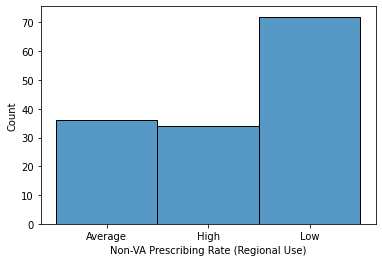

In [15]:
# Finding how the Non-VA Prescribing Rate is classified
sns.histplot(opi_prescribing_rates_df_clean["Non-VA Prescribing Rate (Regional Use)"])

In [21]:
opi_prescribing_rates_df_clean

,id,Percent Change,city,facility_name,latitude,longitude,2012 Prescribing Rate,2018 Prescribing Rate,point,Non-VA Prescribing Rate (Regional Use),state_full,state_postal,2012 to 2018 Rate Difference
0,146,-0.401380,Sheridan,Sheridan VA Medical Center,44.826970,-106.984884,0.139492,0.083503,POINT (-106.984884 44.82697),Average,Wyoming,WY,-0.055989
1,145,-0.461828,Cheyenne,Cheyenne VA Medical Center,41.145728,-104.789595,0.187310,0.100805,POINT (-104.789595 41.145728),Average,Wyoming,WY,-0.086505
2,144,-0.357874,Milwaukee,Clement J. Zablocki VA Medical Center,43.019606,-87.976158,0.137437,0.088252,POINT (-87.976158 43.019606),Average,Wisconsin,WI,-0.049185
3,143,-0.441018,Tomah,Tomah VA Medical Center,44.001107,-90.493910,0.122421,0.068431,POINT (-90.49391 44.001107),Average,Wisconsin,WI,-0.053990
4,142,-0.319233,Madison,William S. Middleton Memorial Veterans' Hospital,43.075146,-89.431033,0.132611,0.090277,POINT (-89.431033 43.075146),Average,Wisconsin,WI,-0.042334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5,-0.587704,Phoenix,Carl T. Hayden VA Medical Center,33.494758,-112.065910,0.208696,0.086044,POINT (-112.06591 33.494758),High,Arizona,AZ,-0.122651
142,4,-0.531553,Anchorage,Anchorage VA Medical Center,61.231357,-149.744628,0.173934,0.081479,POINT (-149.744628 61.231357),High,Alaska,AK,-0.092455
143,3,-0.217466,Tuscaloosa,Tuscaloosa VA Medical Center,33.193213,-87.488366,0.183320,0.143454,POINT (-87.488366 33.193213),High,Alabama,AL,-0.039866
144,2,-0.476179,Montgomery,Central Alabama VA Medical Center,32.379896,-86.246626,0.160115,0.083872,POINT (-86.246626 32.379896),High,Alabama,AL,-0.076244


In [16]:
# Finding frequency of states mentioned in dataset
state_frequency = opi_prescribing_rates_df_clean["state_full"].value_counts()
state_frequency

# Top 5 states are New York, Pennsylvania, California, Texas and Florida

New York                10
Pennsylvania             8
California               8
Texas                    8
Florida                  6
Ohio                     5
Michigan                 5
Missouri                 4
Illinois                 4
West Virginia            4
North Carolina           4
Arizona                  3
Tennessee                3
Wisconsin                3
Nebraska                 3
Massachusetts            3
Louisiana                3
Kansas                   3
Alabama                  3
Washington               3
Oregon                   3
Georgia                  3
Virginia                 3
South Dakota             3
Indiana                  2
Kentucky                 2
Minnesota                2
Colorado                 2
Iowa                     2
Wyoming                  2
Mississippi              2
South Carolina           2
Oklahoma                 2
Nevada                   2
Rhode Island             1
Alaska                   1
Vermont                  1
A

,2012 Prescribing Rate,2018 Prescribing Rate
2012 Prescribing Rate,1.000000,0.858806
2018 Prescribing Rate,0.858806,1.000000


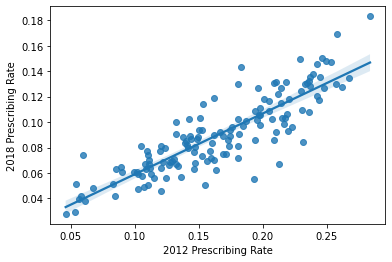

In [17]:
# Plotting correlation between 2012 prescribing rate and 2018 prescribing rate
sns.regplot(x="2012 Prescribing Rate", y="2018 Prescribing Rate", data = opi_prescribing_rates_df_clean)
opi_prescribing_rates_df_clean[['2012 Prescribing Rate', '2018 Prescribing Rate']].corr()

# Correlation of 0.858806 shows a strong relationship between the two prescribing rates. This makes sense.

,latitude,2018 Prescribing Rate
latitude,1.000000,0.028647
2018 Prescribing Rate,0.028647,1.000000


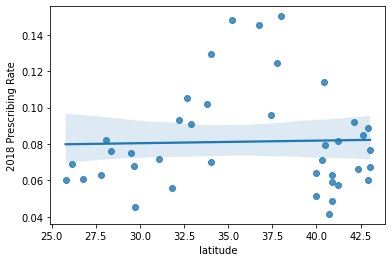

In [18]:
# Plotting latitude vs 2018 prescribing rate using only top 5 states
top5 = ["New York", "Pennsylvania", "California", "Texas", "Florida"]
top5_filter = opi_prescribing_rates_df_clean["state_full"].isin(top5)
top5_df = opi_prescribing_rates_df_clean[top5_filter]

sns.regplot(x="latitude", y="2018 Prescribing Rate", data = top5_df)
top5_df[['latitude', '2018 Prescribing Rate']].corr()

# Correlation of 0.028647 shows weak relationship, also there is upside down U shape pattern which is not useful

,longitude,2018 Prescribing Rate
longitude,1.000000,-0.630432
2018 Prescribing Rate,-0.630432,1.000000


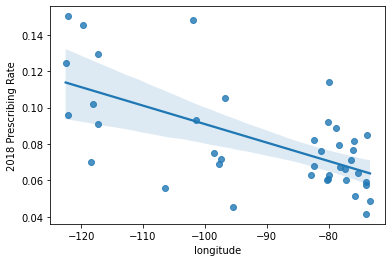

In [19]:
# Plotting longitude vs 2018 prescribing rate
sns.regplot(x="longitude", y="2018 Prescribing Rate", data = top5_df)
top5_df[['longitude', '2018 Prescribing Rate']].corr()

# Correlation of -0.630432 is medium-strong relationship, as you go more East, the prescribing rate is generally lower